# Predspracovanie dat

----

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
pd.options.display.width = None
pd.options.display.max_columns = None

In [3]:
data_personal = pd.read_csv("data/personal_train.csv")
data_other = pd.read_csv("data/other_train.csv")

In [4]:
data_personal.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02
1,1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00
2,2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09
3,3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00
4,4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15


In [5]:
data_other.head()

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
0,0,Latonya Wilhelm,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",f,11th,f,NaN,NaN,0.0,0.0,f,f,NaN,NaN,28729.0,40.0,Not-in-family,f,Private,f,negative.|1821,Separated,f,United-States,f,F,"{'TSH measured':'f','query hyperthyroid':'f','...",f,other,7.0,Machine-op-inspct,f,?,White,f
1,1,Stacy Martinson,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",t,11th,f,124.0,1.04,0.0,0.0,t,f,0.035,NaN,250121.0,40.0,Wife,f,Private,f,negative.|3498,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,7.0,Other-service,f,?,White,f
2,2,Linda Derby,Unit 5333 Box 7103\nDPO AA 03763,t,HS-grad,f,60.0,1.04,0.0,0.0,f,f,11.000,0.8,296125.0,30.0,Unmarried,f,Private,f,negative.|3768,Separated,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Priv-house-serv,f,?,Black,f
3,3,Albert Cipriano,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",t,Bachelors,f,101.0,0.81,0.0,0.0,f,f,0.250,2.0,187830.0,50.0,Not-in-family,f,Private,f,negative.|2403,Never-married,f,United-States,f,FALSE,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Exec-managerial,f,?,White,f
4,4,David Cook,"7984 Jason Motorway Suite 440\nNelsonville, OK...",t,Some-college,f,89.0,0.83,0.0,0.0,f,f,1.800,2.3,312017.0,40.0,Not-in-family,f,Private,f,negative.|1588,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,10.0,Exec-managerial,f,?,White,f


In [6]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [7]:
data_personal.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2196
top,NaN,Terry Murphy,"62388 Dalton Highway Apt. 500\nMichaelchester,...",NaN,F,1951-06-15
freq,NaN,2,1,NaN,1448,2
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


In [8]:
data_other.describe(include='all')

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
count,2287.000000,2287,2287,2280,2279,2278,2126.000000,2039.000000,2281.000000,2279.000000,2272,2276,2038.000000,1804.000000,2277.000000,2276.000000,2278,2283,2109,2278,2280,2281,2282,2282,2276,2279,2280,2274,2278,2056.000000,2279,2276,2280,2280,2276
unique,NaN,2236,2237,3,24,3,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,6,3,9,3,2237,6,3,36,2,6,539,3,10,NaN,14,2,1,5,3
top,NaN,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,HS-grad,f,NaN,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,Not-in-family,f,Private,f,negative.|1571,Never-married,f,United-States,f,f,"{'TSH measured':'f','query hyperthyroid':'f','...",t,other,NaN,Adm-clerical,f,?,White,f
freq,NaN,3,3,2043,634,2266,NaN,NaN,NaN,NaN,2005,2221,NaN,NaN,NaN,NaN,734,2250,1465,2239,3,889,2259,2053,2275,2023,109,1797,1177,NaN,390,2275,2280,1891,2241
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,109.462088,0.996436,194.064007,817.727512,NaN,NaN,4.691447,2.020926,187889.619675,38.293058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.050584,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,35.879295,0.191213,9116.985776,5971.192914,NaN,NaN,22.630656,0.814135,103904.464111,12.341755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.494250,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.310000,-200100.000000,0.000000,NaN,NaN,0.005000,0.050000,19395.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,88.000000,0.880000,0.000000,0.000000,NaN,NaN,0.440000,1.600000,115631.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,104.000000,0.980000,0.000000,0.000000,NaN,NaN,1.400000,2.000000,176262.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,126.000000,1.080000,0.000000,0.000000,NaN,NaN,2.600000,2.400000,237141.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


Ako prve vyhodime zbytocny stlpec 'Unnamed: 0', ktory je vlastne pouzivany ako index stlpec.

In [9]:
data_personal = data_personal.drop(['Unnamed: 0'], axis=1)

In [10]:
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 35 columns):
Unnamed: 0            2287 non-null int64
name                  2287 non-null object
address               2287 non-null object
FTI measured          2280 non-null object
education             2279 non-null object
lithium               2278 non-null object
TT4                   2126 non-null float64
T4U                   2039 non-null float64
capital-loss          2281 non-null float64
capital-gain          2279 non-null float64
on thyroxine          2272 non-null object
tumor                 2276 non-null object
TSH                   2038 non-null float64
T3                    1804 non-null float64
fnlwgt                2277 non-null float64
hours-per-week        2276 non-null float64
relationship          2278 non-null object
thyroid surgery       2283 non-null object
workclass             2109 non-null object
I131 treatment        2278 non-null object
class                 2280

To iste urobime aj pre data_other dataset.

In [11]:
data_other = data_other.drop(['Unnamed: 0'], axis=1)

# Spojenie datasetov

----

## Spojenie duplikatnych hodnot v dataset 'data_other'

In [12]:
data_other[data_other['name'] == 'Christian Ortega']

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
208,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,Assoc_acdm,f,120.0,1.31,0.0,0.0,f,f,1.5,2.7,213214.0,40.0,Husband,f,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,12.0,Sales,f,?,White,f
1600,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,NaN,NaN,120.0,1.31,0.0,NaN,f,f,1.5,2.7,213214.0,40.0,Husband,f,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,12.0,NaN,NaN,?,White,f
1611,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,Assoc_acdm,f,120.0,NaN,0.0,0.0,f,f,1.5,2.7,213214.0,40.0,Husband,NaN,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,NaN,NaN,NaN,NaN,12.0,Sales,f,?,White,f


Ako vidime, v tomto dataset sa nachadzaju duplikaty ktore budeme musiet mergenut do jedneho zaznamu.

In [13]:
data_personal[data_personal['name']=='Terry Murphy']

,name,address,age,sex,date_of_birth
654,Terry Murphy,"53302 Julie Lane\nNorth Stanleyburgh, KY 68353",77.0,F,1941-08-06
976,Terry Murphy,"3913 Jeffery Underpass\nSouth Johnland, CO 78601",54.0,?,1964-06-26


Tato hodnota zodpoveda duplicitnym zaznamom v datasete data_other podla mena a adresy

In [14]:
len(data_other[data_other.duplicated(subset=['name', 'address'])])

50

Prezrieme zaznami ktore maju rovnaku hodnotu pre name aj adress, aby sme vedeli ako ich mame mergeovat.

In [15]:
data_other[data_other.duplicated(subset=['name', 'address'], keep=False)].sort_values(by=['name'])

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
2164,Abraham Hicks,"93316 Amber Highway\nMarkland, AR 79881",t,Doctorate,f,111.0,1.15,NaN,0.0,NaN,NaN,1.30,2.40,87507.0,60.0,Husband,f,Private,f,NaN,Married-civ-spouse,f,India,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,16.0,Prof-specialty,f,?,Asian-Pac-Islander,f
244,Abraham Hicks,"93316 Amber Highway\nMarkland, AR 79881",t,Doctorate,f,NaN,1.15,0.0,0.0,NaN,f,1.30,2.40,87507.0,60.0,Husband,f,Private,f,negative.|3675,Married-civ-spouse,f,India,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,16.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1517,Alvin Cannon,"487 Ward Cove Apt. 949\nSouth Elizabethville, ...",t,Bachelors,f,127.0,0.90,0.0,0.0,t,f,0.08,NaN,101709.0,40.0,Husband,t,Private,f,negative.|3276,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,13.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1134,Alvin Cannon,"487 Ward Cove Apt. 949\nSouth Elizabethville, ...",NaN,Bachelors,NaN,NaN,0.90,0.0,0.0,t,f,NaN,NaN,101709.0,40.0,Husband,t,NaN,f,negative.|3276,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,13.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1188,Ann Waller,"11040 Melissa Trafficway Suite 038\nKimbury, N...",NaN,Assoc-voc,f,100.0,0.88,0.0,0.0,f,f,3.40,NaN,NaN,40.0,Not-in-family,f,Private,f,negative.|2635,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,11.0,NaN,f,?,White,f
1906,Ann Waller,"11040 Melissa Trafficway Suite 038\nKimbury, N...",t,Assoc-voc,f,100.0,NaN,0.0,NaN,f,f,3.40,1.60,306967.0,40.0,Not-in-family,f,Private,f,negative.|2635,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,11.0,Adm-clerical,f,?,White,f
1305,Annette Buzard,"355 Cynthia Lakes\nWest Reginald, MO 65366",NaN,HS-grad,f,21.0,1.10,0.0,0.0,f,f,468.00,0.70,338270.0,40.0,Unmarried,f,NaN,f,negative.|3047,Separated,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,9.0,Adm-clerical,f,?,White,f
696,Annette Buzard,"355 Cynthia Lakes\nWest Reginald, MO 65366",t,HS-grad,f,21.0,1.10,0.0,0.0,f,f,468.00,0.70,338270.0,40.0,Unmarried,NaN,Private,f,negative.|3047,Separated,f,United-States,NaN,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,9.0,Adm-clerical,f,?,White,f
1986,Carlos Schwartz,"639 Suzanne Port\nErinmouth, CA 39976",t,HS_grad,f,NaN,0.85,0.0,0.0,f,f,5.00,0.70,95336.0,45.0,Husband,f,Private,f,negative.|2679,Married-civ-spouse,f,United-States,NaN,f,"{'TSH measured':'t','query hyperthyroid':'f','...",NaN,SVI,9.0,Tech-support,f,?,White,f
470,Carlos Schwartz,"639 Suzanne Port\nErinmouth, CA 39976",t,HS_grad,f,54.0,0.85,NaN,0.0,f,NaN,5.00,0.70,95336.0,45.0,Husband,f,Private,NaN,negative.|2679,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Tech-support,f,?,White,f


Urobime novy dataset, ktory budeme mat groupnuty podla mena aj adresy, aby sme lahsie vedeli mergeovat polozky.

In [16]:
grouped = data_other[data_other.duplicated(subset=['name', 'address'], keep=False)].groupby(['name', 'address'])

Zadefinujeme funkciu pomocou ktorej budeme mergeovat duplikatne polozky.

In [17]:
from collections import Counter

def handle_duplicate_rows(rows):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # Zoberieme si iba polozky numerickeho typu, nad ktorymi aplikujeme agregovanu funkciu: mean
    numeric_rows = rows.select_dtypes(include=numerics).agg(np.mean)
    
    # To iste urobime pre polozky ineho datoveho typu ako numericke, na ktore aplikujeme agregovanu funkciu najcastejsie
    # vyskytujucu hodnotu
    cat_rows = rows.select_dtypes(include=['object']).agg(most_common)
    
    # Skobinujeme tieto dva datasety
    combined = pd.concat([numeric_rows, cat_rows], axis=0)
    #print(pd.DataFrame(combined))
    return combined
    
# Funkcia ktora vrati najcastejsiu hodnotu
def most_common(rows):
    counts = rows.value_counts()
    if len(counts) > 0:
        return counts.index[0]
    
    return float('nan')

Aplikujeme transformacnu funkciu na duplikatne polozky z datasetu

In [18]:
result = grouped.apply(handle_duplicate_rows).reset_index(drop=True)

Vyhodime vsetky duplicity z data_other datasetu.

In [19]:
dropped_duplicates = data_other.drop_duplicates(subset=['name', 'address'], keep=False)
print(len(dropped_duplicates))

2188


Pridame naspat duplicity, ale uz iba jeden zaznam z kazdeho, z polozkami spravne mergenutymi.

In [20]:
data_other_ = pd.concat([dropped_duplicates, result])
data_other_.head()

/Users/edvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,address,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,name,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass
0,f,f,NaN,f,NaN,?,f,NaN,NaN,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",0.0,0.0,negative.|1821,11th,7.0,28729.0,f,40.0,f,f,Separated,"{'TSH measured':'f','query hyperthyroid':'f','...",Latonya Wilhelm,United-States,Machine-op-inspct,f,f,F,White,other,Not-in-family,f,f,Private
1,t,f,NaN,f,1.04,?,f,0.035,124.0,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",0.0,0.0,negative.|3498,11th,7.0,250121.0,f,40.0,f,f,Married-civ-spouse,"{'TSH measured':'t','query hyperthyroid':'f','...",Stacy Martinson,United-States,Other-service,t,f,f,White,other,Wife,f,f,Private
2,t,f,0.8,t,1.04,?,f,11.000,60.0,Unit 5333 Box 7103\nDPO AA 03763,0.0,0.0,negative.|3768,HS-grad,9.0,296125.0,f,30.0,f,f,Separated,"{'TSH measured':'t','query hyperthyroid':'f','...",Linda Derby,United-States,Priv-house-serv,f,f,f,Black,SVI,Unmarried,f,f,Private
3,t,f,2.0,t,0.81,?,f,0.250,101.0,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",0.0,0.0,negative.|2403,Bachelors,13.0,187830.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",Albert Cipriano,United-States,Exec-managerial,f,f,FALSE,White,SVI,Not-in-family,f,f,Private
4,t,f,2.3,t,0.83,?,f,1.800,89.0,"7984 Jason Motorway Suite 440\nNelsonville, OK...",0.0,0.0,negative.|1588,Some-college,10.0,312017.0,f,40.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",David Cook,United-States,Exec-managerial,f,f,f,White,other,Not-in-family,f,f,Private


In [21]:
print(len(data_other_))

2237


Preverime dlzku data_other datasetu, tato musi byt rovnaka z dlzkou data_personal datasetu, preto lebo v nom ninto ziadne duplicity.

In [22]:
print(len(data_other_) == len(data_personal))

True


-----

## Nasleduje aby sme spojili datasety 'data_other_' a 'data_personal'

In [23]:
data_final = pd.merge(data_personal, data_other_, how='inner', left_on=['name', 'address'], right_on=['name', 'address'])
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,?,f,0.10,182.0,0.0,0.0,negative.|2815,HS-grad,9.0,144844.0,f,40.0,f,f,Married-civ-spouse,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Craft-repair,f,f,f,White,SVHC,Husband,f,f,Private
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,?,f,2.00,136.0,0.0,0.0,negative.|3345,Bachelors,13.0,335067.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Sales,f,f,f,White,SVHD,Not-in-family,f,f,Private
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,?,f,NaN,NaN,0.0,0.0,negative.|262,Prof-school,15.0,186035.0,f,30.0,f,f,Married-civ-spouse,"{'TSH measured':'f','query hyperthyroid':'f','...",United-States,Sales,f,f,f,White,other,Husband,f,f,Self-emp-not-inc
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,?,f,1.60,136.0,0.0,0.0,negative.|2228,Bachelors,13.0,36601.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Prof-specialty,f,f,f,White,SVI,Not-in-family,f,f,Private
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,?,f,0.67,107.0,0.0,0.0,negative.|3085,HS-grad,9.0,29810.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Other-service,f,f,f,White,other,Not-in-family,f,f,Private


Preverime ci nahodou neostali nejake duplicity vo finalnom datasete.

In [24]:
data_final[data_final.duplicated(subset=['name', 'address'], keep=False)]

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass


-----

## Pretoze v polozky 'medical_info' jestvuju dalsie atributy v podobe JSONu, potrebujeme ich spracovat a pridat do datasetu.

In [25]:
data_final['medical_info'][0]

"{'TSH measured':'t','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'?','sick':'f','T4U measured':'f','psych':'t','query hypothyroid':'f'}"

In [26]:
import ast

# Najprv vytvorime novy dataset z atributov ktore su zaenkodovane ako json v polozky medical_info
new_columns = data_final.pop('medical_info').apply(lambda x: pd.Series(ast.literal_eval(x)))

# Potom ich pridame do data_final datasetu.
data_final = data_final.join(new_columns)

In [27]:
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,?,f,0.10,182.0,0.0,0.0,negative.|2815,HS-grad,9.0,144844.0,f,40.0,f,f,Married-civ-spouse,United-States,Craft-repair,f,f,f,White,SVHC,Husband,f,f,Private,t,f,t,f,?,f,f,t,f
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,?,f,2.00,136.0,0.0,0.0,negative.|3345,Bachelors,13.0,335067.0,f,50.0,f,f,Never-married,United-States,Sales,f,f,f,White,SVHD,Not-in-family,f,f,Private,t,f,t,f,145,t,t,f,f
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,?,f,NaN,NaN,0.0,0.0,negative.|262,Prof-school,15.0,186035.0,f,30.0,f,f,Married-civ-spouse,United-States,Sales,f,f,f,White,other,Husband,f,f,Self-emp-not-inc,f,f,f,f,?,f,f,f,f
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,?,f,1.60,136.0,0.0,0.0,negative.|2228,Bachelors,13.0,36601.0,f,50.0,f,f,Never-married,United-States,Prof-specialty,f,f,f,White,SVI,Not-in-family,f,f,Private,t,f,t,f,117,t,t,f,t
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,?,f,0.67,107.0,0.0,0.0,negative.|3085,HS-grad,9.0,29810.0,f,50.0,f,f,Never-married,United-States,Other-service,f,f,f,White,other,Not-in-family,f,f,Private,t,f,t,f,126,f,t,f,f


Vidime ze uz v data_final datasete nemame atribut 'medical_info' a ze jeho polozky su ako nove atributy v datasete.

----

## Analyzu doplnenych atributov

In [28]:
new_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 9 columns):
TSH measured                 2237 non-null object
query hyperthyroid           2237 non-null object
TT4 measured                 2237 non-null object
on antithyroid medication    2237 non-null object
FTI                          2237 non-null object
sick                         2237 non-null object
T4U measured                 2237 non-null object
psych                        2237 non-null object
query hypothyroid            2237 non-null object
dtypes: object(9)
memory usage: 254.8+ KB


In [29]:
new_columns.describe(include="all")

,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
count,2237,2237,2237,2237,2237,2237,2237,2237,2237
unique,2,3,3,3,199,3,3,3,3
top,t,f,t,f,?,f,t,f,f
freq,2005,2100,2088,2209,233,2149,2001,2127,2104


In [30]:
for column in new_columns:
    print(column)
    print(data_final[column].value_counts())
    print("----")

TSH measured
t    2005
f     232
Name: TSH measured, dtype: int64
----
query hyperthyroid
f      2100
t       136
f.8       1
Name: query hyperthyroid, dtype: int64
----
TT4 measured
t      2088
f       148
t.2       1
Name: TT4 measured, dtype: int64
----
on antithyroid medication
f      2209
t        27
f.2       1
Name: on antithyroid medication, dtype: int64
----
FTI
?      233
93      46
104     43
114     43
98      42
101     40
100     40
112     40
96      38
92      36
97      36
113     35
106     34
107     34
109     33
95      33
105     33
102     32
108     32
110     29
91      29
121     29
103     29
94      29
115     28
88      28
116     28
90      28
117     27
83      26
      ... 
47       1
5.4      1
207      1
242      1
8.9      1
56       1
362      1
32       1
24       1
223      1
218      1
216      1
201      1
251      1
189      1
247      1
26       1
42       1
3        1
162      1
57       1
194      1
43       1
228      1
50       1
187      1

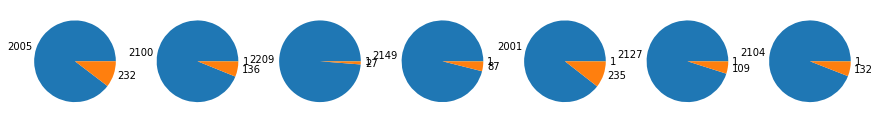

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(15, 15))

ax1.pie(data_final['TSH measured'].value_counts(), labels=data_final['TSH measured'].value_counts())
ax2.pie(data_final['query hyperthyroid'].value_counts(), labels=data_final['query hyperthyroid'].value_counts())
ax3.pie(data_final['on antithyroid medication'].value_counts(), labels=data_final['on antithyroid medication'].value_counts())
ax4.pie(data_final['sick'].value_counts(), labels=data_final['sick'].value_counts())
ax5.pie(data_final['T4U measured'].value_counts(), labels=data_final['T4U measured'].value_counts())
ax6.pie(data_final['psych'].value_counts(), labels=data_final['psych'].value_counts())
ax7.pie(data_final['query hypothyroid'].value_counts(), labels=data_final['query hypothyroid'].value_counts())
plt.show()

----

## Nasleduje aby sme vycistili dataset a vyhodili zbytocne atributy, ktore nemaju nic spolocne pre predikciu choroby na stitnu zlazu.

Este z analyzi datasetu sme zistili ze nasledovne atributy maju iba jednu hodnotu, takze tiez ich mozme vyhodit z datasetu:
- hypopituitary
- TBG measured
- TBG

In [34]:
samevalue_columns = ['hypopituitary', 'TBG measured', 'TBG']

In [35]:
data_final = data_final.drop(samevalue_columns, axis=1)

# Prezrieme si vycisteny dataset
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,class,goitre,lithium,marital-status,native-country,on thyroxine,pregnant,query on thyroxine,race,referral source,thyroid surgery,tumor,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,0.10,182.0,negative.|2815,f,f,Married-civ-spouse,United-States,f,f,f,White,SVHC,f,f,t,f,t,f,?,f,f,t,f
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,2.00,136.0,negative.|3345,f,f,Never-married,United-States,f,f,f,White,SVHD,f,f,t,f,t,f,145,t,t,f,f
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,NaN,NaN,negative.|262,f,f,Married-civ-spouse,United-States,f,f,f,White,other,f,f,f,f,f,f,?,f,f,f,f
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,1.60,136.0,negative.|2228,f,f,Never-married,United-States,f,f,f,White,SVI,f,f,t,f,t,f,117,t,t,f,t
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,0.67,107.0,negative.|3085,f,f,Never-married,United-States,f,f,f,White,other,f,f,t,f,t,f,126,f,t,f,f


-----

## Este z analyzi sme zistili ze atribut class je poskodeny tim ze za jeho classou, ma nejaku zbytocnu hodnotu numericku, tak ho potrebujeme upravit.

In [36]:
data_final['class'] = data_final['class'].map(lambda x: str(x).split('.')[0])

Preverime ci sa hodnoty spravne namapovali

In [37]:
data_final['class'].value_counts()

negative                     2131
increased binding protein      97
decreased binding protein       9
Name: class, dtype: int64

----

## Kedze zistili sme ze datum narodenia moze mat rozne formy, ideme ho upravit do jednej generickej formy 'RRRR-MM-DD'

In [38]:
import dateutil.parser as parser
def formatDate(dateString):
    if not isinstance(dateString, str):
        return float('nan')
    # zoberiem si len datum, cas orezem
    dateString = dateString[:min(len(dateString), 10)]
    #print(dateString)
    dateObj = parser.parse(dateString, yearfirst = True)
    #print(dateObj)
    return dateObj.strftime('%Y-%m-%d')

In [39]:
data_final['date_of_birth'] = data_final['date_of_birth'].map(lambda dateString: formatDate(dateString))

In [40]:
data_final['date_of_birth'].head()

0    1994-05-02
1    1974-04-29
2    1962-06-09
3    1946-12-16
4    1955-10-15
Name: date_of_birth, dtype: object

In [41]:
data_final[data_final['date_of_birth'].isnull()]

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,class,goitre,lithium,marital-status,native-country,on thyroxine,pregnant,query on thyroxine,race,referral source,thyroid surgery,tumor,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
538,Veronica Rich,"702 Hughes Park\nDerrickside, VT 09479",NaN,F,NaN,t,t,1.5,t,0.82,0.6,120.0,negative,f,f,Married-civ-spouse,United-States,t,f,f,White,other,f,NaN,t,f,t,f,146,f,t,f,f


In [83]:
from datetime import datetime
def getCurYear(row):
    if not isinstance(row['date_of_birth'], str):
        return float('nan')
    datetime_object = datetime.strptime(row['date_of_birth'], '%Y-%m-%d')
    return datetime_object.year + int(row['age'])

In [84]:
data_final['cur_year'] = data_final.apply(lambda row: getCurYear(row), axis=1)

In [85]:
data_final[['age', 'date_of_birth', 'cur_year']].head()

,age,date_of_birth,cur_year
0,10.990461,1994-05-02,2004.0
1,17.214341,1974-04-29,1991.0
2,20.480609,1962-06-09,1982.0
3,24.251037,1946-12-16,1970.0
4,22.277266,1955-10-15,1977.0


In [86]:
data_final['cur_year'].unique()

array([2004., 1991., 1982., 1970., 1977., 1972., 1983., 1988., 1971.,
       1965., 1987., 1968., 1967., 1969., 1996., 2010., 1979., 1990.,
       1989., 1976., 1974., 2001., 1978., 2006., 2003., 1973., 1975.,
       1999., 1986., 1981., 1998., 2083., 1958., 2005., 1962., 1994.,
       2000., 1966., 1964., 2002., 1980., 1993., 1995., 2008., 2072.,
       1984., 2074., 2009., 1961., 2062., 1963., 1992., 2007., 2075.,
       2076., 2084., 2057., 1985., 1956., 2064., 1997., 2012., 2011.,
       2078., 2067., 2065., 1952., 2056., 1960., 2069.,   nan, 2081.,
       2014., 2077., 2017., 2079., 1957., 2016., 2015., 2080., 2066.,
       2061., 2068., 1650., 1959., 2070., 2086., 2082., 2058., 1955.,
       2085., 2063., 2073., 1953., 1954., 2013.])

In [87]:
meanCurYear = data_final['cur_year'].mean()
meanCurYear

1988.3904293381038

In [88]:
def getDateOfBirth(age):
    return datetime(meanCurYear - int(age), 1, 1)

In [89]:
data_final[(data_final['date_of_birth'].isnull()) & (data_final['age'].dropna())] = data_final[(data_final['date_of_birth'].isnull()) & data_final['age'].dropna()].apply(lambda row: getDateOfBirth(row['age']), axis=1)

TypeError: ('integer argument expected, got float', 'occurred at index 538')

--------

## Pretransformujeme true/false hodnoty na 1/0.

In [42]:
bool_columns = [
    'FTI measured',
    'I131 treatment',
    'T3 measured',
    'goitre',
    'lithium',
    'on thyroxine',
    'pregnant',
    'tumor',
    'query on thyroxine',
    'thyroid surgery',
    'TSH measured',
    'query hyperthyroid',
    'TT4 measured',
    'on antithyroid medication',
    'sick',
    'T4U measured',
    'psych',
    'query hypothyroid'
]

In [43]:
def mapToBool(value):
    if not isinstance(value, str):
        return float('nan')
    return (int(1) if value[0].lower() == 't' else int(0))

Odstranime neciste hodnoty premapovanim na T/F

In [44]:
for bool_column in bool_columns:
    data_final[bool_column] = data_final[bool_column].map(lambda value: mapToBool(value))

In [45]:
data_final['FTI'] = data_final['FTI'].map(lambda x: float('nan') if (x == '?' or x == np.nan) else float(x))

In [46]:
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,class,goitre,lithium,marital-status,native-country,on thyroxine,pregnant,query on thyroxine,race,referral source,thyroid surgery,tumor,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,1994-05-02,0,0,1.6,1.0,NaN,0.10,182.0,negative,0,0.0,Married-civ-spouse,United-States,0.0,0,0,White,SVHC,0,0.0,1,0,1,0,NaN,0,0,1,0
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29,1,0,1.3,1.0,0.94,2.00,136.0,negative,0,0.0,Never-married,United-States,0.0,0,0,White,SVHD,0,0.0,1,0,1,0,145.0,1,1,0,0
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,0,0,NaN,0.0,NaN,NaN,NaN,negative,0,0.0,Married-civ-spouse,United-States,0.0,0,0,White,other,0,0.0,0,0,0,0,NaN,0,0,0,0
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16,1,0,1.8,1.0,1.16,1.60,136.0,negative,0,0.0,Never-married,United-States,0.0,0,0,White,SVI,0,0.0,1,0,1,0,117.0,1,1,0,1
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,1,0,1.8,1.0,0.85,0.67,107.0,negative,0,0.0,Never-married,United-States,0.0,0,0,White,other,0,0.0,1,0,1,0,126.0,0,1,0,0


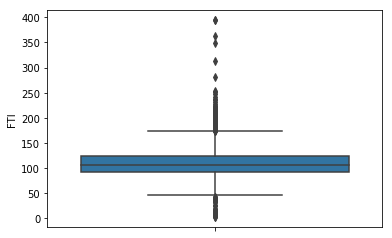

In [47]:
sns.boxplot(y="FTI", data=data_final)

----

## Pridame stlpec ktory bude ukazovat ze kolko testov clovek podstupil

Vytvorime dataset ktory bude obsahovat iba stlpce ktore ukazuju ci hormon bol namerany alebo nie

In [48]:
measured_df = data_final.filter(regex='measured')
measured_df.head()

,FTI measured,T3 measured,TSH measured,TT4 measured,T4U measured
0,0,1.0,1,1,0
1,1,1.0,1,1,1
2,0,0.0,0,0,0
3,1,1.0,1,1,1
4,1,1.0,1,1,1


In [49]:
# Urobime sucet po stlpcov pre dany riadok
result = measured_df.sum(axis=1)

# Vytvorime novy atribut 'measured_hormones' kde priradime tento sucet
data_final['measured_hormones'] = result

----

## Ideme sa pozriet na distribuciu chybajucich hodnot pre dany dataset

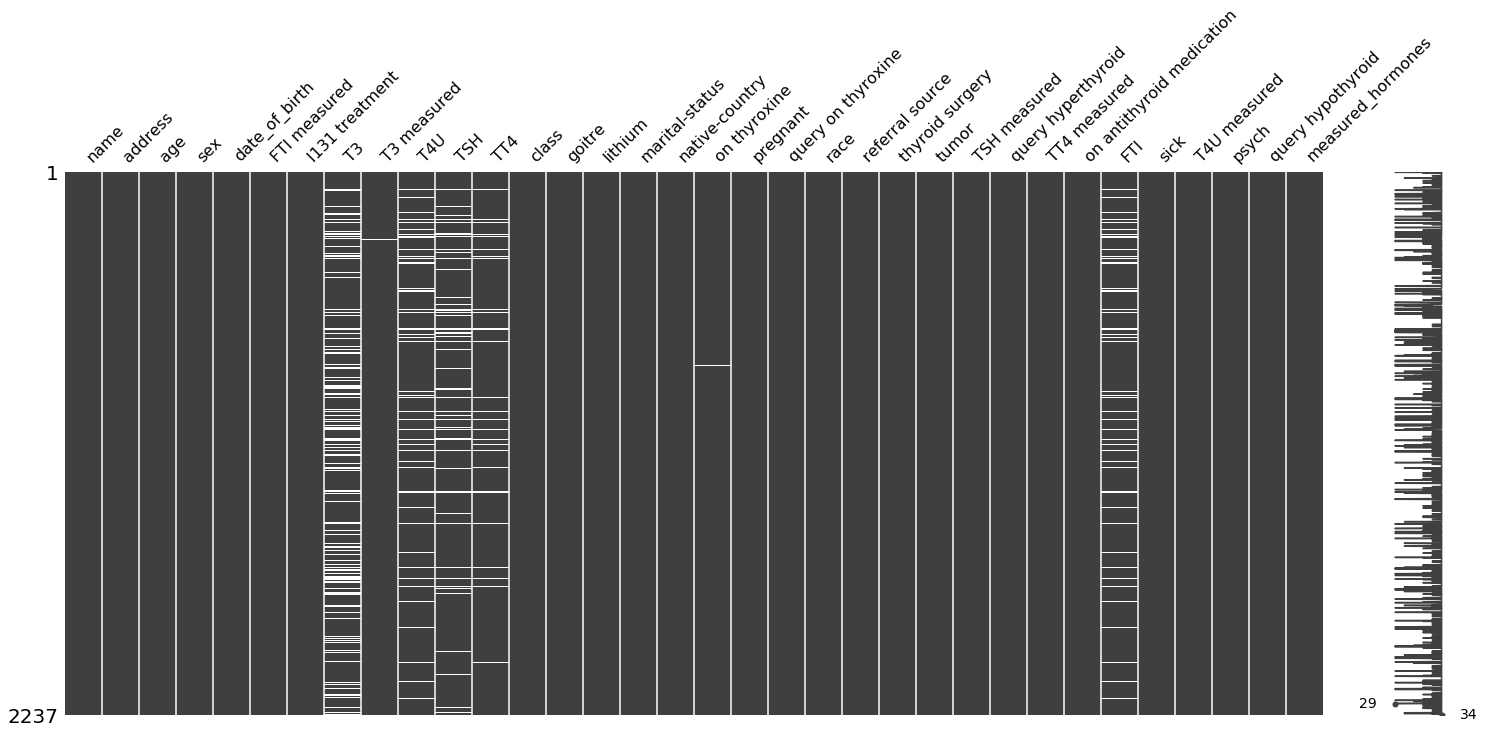

In [50]:
import missingno as msno

msno.matrix(data_final)
plt.show()

Na tomto grafe vidime rozlozenie chybajucich hodnot v datasete. Vidime ze hodnoty chybaju iba v 6 stlpcoch. Taktiez z tohto grafu vidime ze pri jednom zazname chyba v 4 stlpcoch hodnota.

### Vytvorime mapu korelacii

In [81]:
corr_df = data_final
corr_m = corr_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

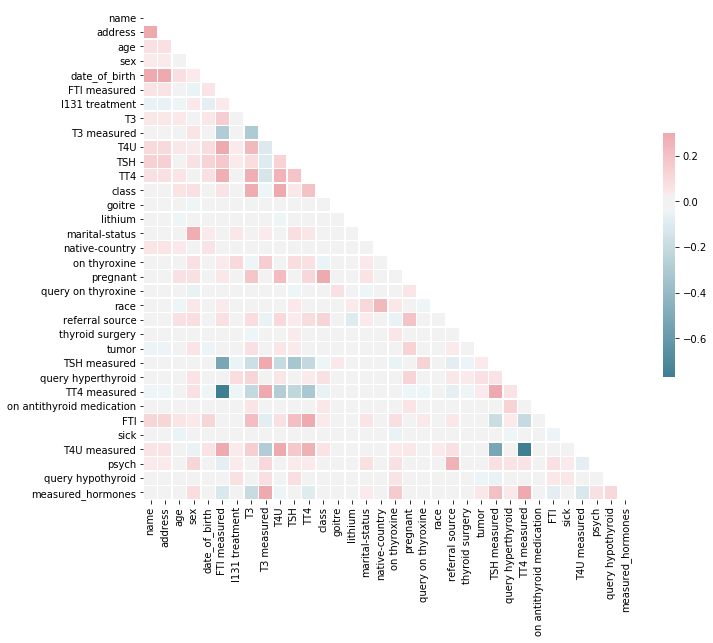

In [82]:
mask = np.zeros_like(corr_m, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_m, mask = mask, cmap = cmap, vmax = .3, center = 0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

class ModelTransformer(TransformerMixin):

    def __init__(self, model):
        self.model = model

    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        print(self.model.score(*args, **kwargs))
        return self

    def transform(self, X, **transform_params):
        return pd.DataFrame(self.model.predict(X))
    

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import minmax_scale
from sklearn import model_selection as ms
from sklearn import preprocessing

import scipy.stats as stats

from sklearn.pipeline import Pipeline, FeatureUnion

In [54]:
class Transformations:
    def __init__(self):
        self.pipeline = Pipeline([('classifier', FeatureUnion([('dtc', ModelTransformer(LinearRegression())),
                                                               ('knn', ModelTransformer(KNeighborsRegressor(5)))]))])
        
        
    # Metoda doplni cybajuce hodnoty pre stlpec ktoreho meno je dane cez parameter a metrika doplnovania chybajucich hodnot tiez
    def predict_numeric(self, data, strategy, column_name):
        mean_imputer = Imputer(missing_values='NaN', strategy=strategy, axis=0)
        mean_imputer = mean_imputer.fit(np.array(data[column_name]).reshape(-1, 1))
        
        imputed_height = mean_imputer.transform(np.array(data[column_name]).reshape(-1, 1))
        data[column_name] = imputed_height
        
        return data
    
    
    # Metoda pomocou ktorej zaenkodujeme kategoricke hodnoty na numericke, vracia pouzity encoder pre danu metodu.
    def label_encoder(self, data, column_name):
        encoder = preprocessing.LabelEncoder()

        data.loc[data[column_name].isnull() == False, column_name] = encoder.fit_transform(data[data[column_name].isnull() == False][column_name])

        return encoder
    
    
    # Metoda ktora dostava ako parameter encoder vrateny funkciou label_encoder a vrati povodne encodovane hodnoty.
    def label_decoder(self, data, encoder, column_name):
        return encoder.inverse_transform(data[column_name])
    
    
    # Metoda frati najcastejsiu hodnotu z pola poskytnutym parametrom 'a'
    def most_common(self, a):
        (values, counts) = np.unique(a, return_counts=True)
        ind = np.argmax(counts)
        return values[ind]
    
    
    # Metoda ktora nahradi outlinery zo stlpca datasetu ktoreho meno dostaneme cez parameter
    def identify_outliers(self, data, column_name):
        Q_down = data[column_name].quantile(0.25) - 1.5 * stats.iqr(data[column_name])
        Q_up = data[column_name].quantile(0.95) + 1.5 * stats.iqr(data[column_name])

        return data[(data[column_name] > Q_up) | (data[column_name] < Q_down)][column_name]
        
    def replace_outliers(self, data, column_name):
        Q_down = data[column_name].quantile(0.05)
        Q_up = data[column_name].quantile(0.95)

        data.loc[data[column_name] <= Q_down, column_name] = Q_down
        data.loc[data[column_name] >= Q_up, column_name] = Q_up
        
        
    # Funkcia ktora vrati novy dataset z encodovanymi hodnotamy (one hot encoder) pre dany stlpec.
    def one_hot_encode(self, data, column_name):
        output = pd.get_dummies(data[column_name], prefix=column_name)
        
        data = pd.concat([data, output], axis=1)
        return data
        
        
    # Funckia ktora vrati 2 datasety, jeden z datamy ktore pouzijeme na predikciu, a dalsi ktore obsahuje labely.
    def get_data_columns(self, data, for_column, columns_array):
        train_X = data[data[for_column].isnull() == False][columns_array]
        train_y = data[for_column].dropna().astype(int)

        return train_X, train_y
    
    
    # Metoda ktora vrati dataset z null hodnotami pre stlpec datasetu ktoreho meno dostane cez parameter
    def get_nan_data_columns(self, data, for_column, columns_array):
        return data[data[for_column].isnull()][columns_array]
    
    
    # Funkcia ktora vrati predikovane hodnoty
    def get_predicted_values(self, X, y, X_nan):
        self.pipeline.fit(X, y)
        predicted = self.pipeline.transform(X_nan)
        
        return predicted
    
    
    # Funkcia ktora vrati dataset, z doplnenimi chybajucimi hodnotami predikovanymi pre dany stlpec.
    def replace_predicted_values(self, data, encoder, predicted, for_column):
        data.loc[data[for_column].isnull(), for_column] = predicted[:, 1].reshape(-1, 1)
        
        if encoder != None:
            data[for_column] = self.label_decoder(data, encoder, for_column).reshape(-1, 1)
        
        return data
        
        
    # Metoda ktora skobinuje vsetky metody hore vyzsie, a vrati dataset.
    def predict_values(self, data, for_column, columns_array):
#         columns_array = [(column_name + '_' + str(x)) for column_name in columns_name for x in data[column_name].unique()]
        
#         if data_train[for_column].dtype != np.dtype(np.float64):
#             column_encoder = self.label_encoder(data, for_column)
#         else:
        column_encoder = None
        
        train_X, train_y = self.get_data_columns(data, for_column, columns_array)
        train_X_nan = self.get_nan_data_columns(data, for_column, columns_array)
        
        predicted = self.get_predicted_values(train_X, train_y, train_X_nan)
        
        return self.replace_predicted_values(data, column_encoder, predicted, for_column)
    
    
    # Metoda ktora vrati dataset iba zo stlpcami datasetu ktorych mena dame cez parameter.
    def get_columns_for_prediction(self, data, columns_array):
        
        columns = [(col_name + '_' + str(column_name)) for col_name in columns_array for column_name in data[col_name].unique()]
                                 
        return data.loc[:, columns]

In [55]:
t = Transformations()

In [56]:
data_final = t.predict_numeric(data_final, 'mean', 'TT4')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [57]:
data_final = t.predict_numeric(data_final, 'mean', 'TSH')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [58]:
data_final = t.predict_values(data_final, 'T3', ['TT4', 'TSH'])

0.2730596347135602
0.45535968172591107


In [59]:
data_final = t.predict_values(data_final, 'T4U', ['TT4', 'TSH'])

0.10835674795766692
0.32349104662703354


In [60]:
data_final = t.predict_values(data_final, 'FTI', ['TT4', 'TSH', 'T4U'])

0.9618546466195365
0.7712168005451874


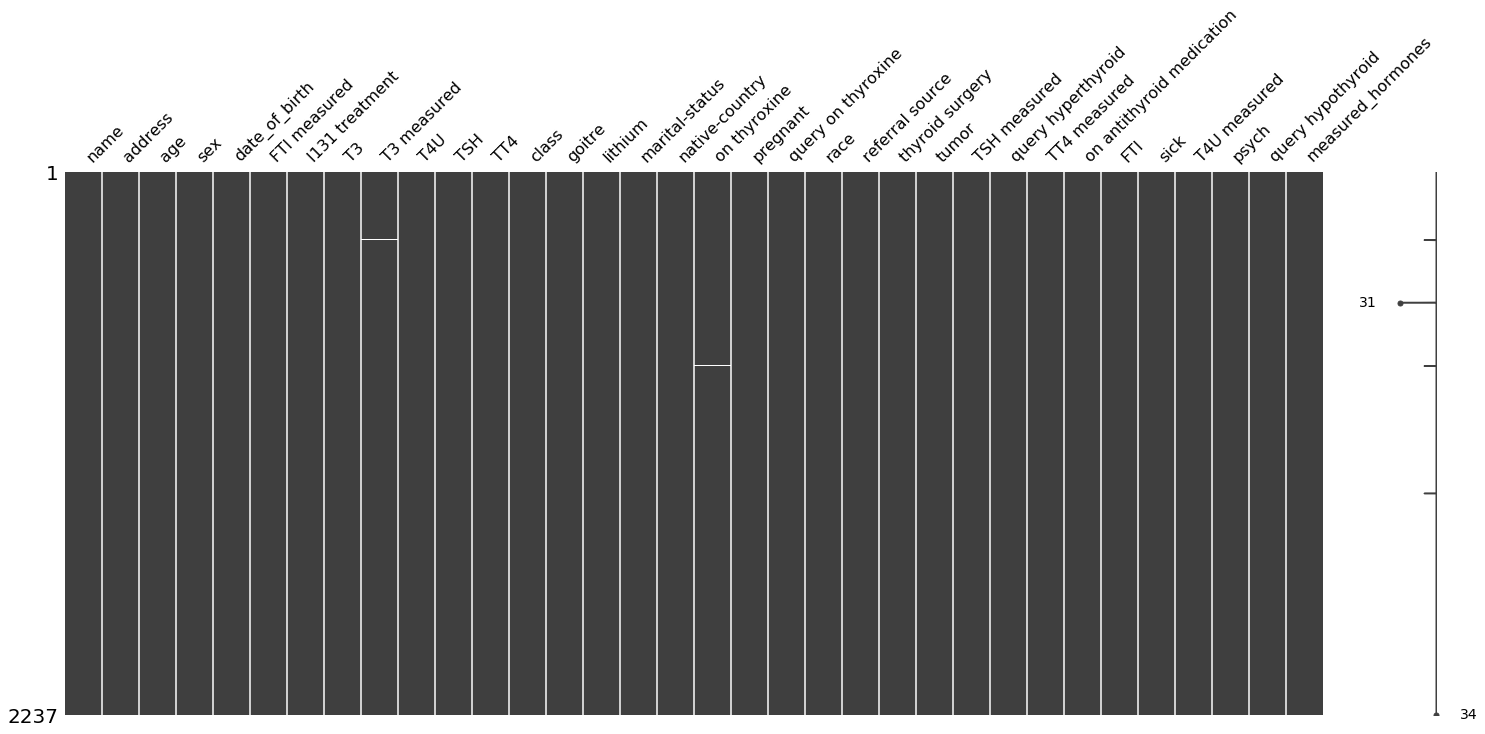

In [61]:
msno.matrix(data_final)
plt.show()

In [62]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 34 columns):
name                         2237 non-null object
address                      2237 non-null object
age                          2236 non-null float64
sex                          2237 non-null object
date_of_birth                2236 non-null object
FTI measured                 2237 non-null int64
I131 treatment               2237 non-null int64
T3                           2237 non-null float64
T3 measured                  2236 non-null float64
T4U                          2237 non-null float64
TSH                          2237 non-null float64
TT4                          2237 non-null float64
class                        2237 non-null object
goitre                       2237 non-null int64
lithium                      2236 non-null float64
marital-status               2237 non-null object
native-country               2237 non-null object
on thyroxine                 2236 non-n

In [63]:
data_final = t.predict_numeric(data_final, 'median', 'tumor')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
data_final = t.predict_numeric(data_final, 'mean', 'lithium')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [65]:
data_final = t.predict_numeric(data_final, 'median', 'tumor')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
data_final = t.predict_numeric(data_final, 'mean', 'on thyroxine')

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [67]:
data_final.loc[data_final['age'].isnull(), 'age'] = t.most_common(data_final['age'].dropna())

In [68]:
# year = datetime.datetime().now() - datetime.timedelta(years=[data_final['date_of_birth'].isnull())
# data_final.loc[data_final['date_of_birth'].isnull(), 'date_of_birth'] = year

In [69]:
data_final.loc[data_final['T3 measured'].isnull(), 'T3 measured'] = t.most_common(data_final['T3 measured'].dropna())

In [70]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 34 columns):
name                         2237 non-null object
address                      2237 non-null object
age                          2237 non-null float64
sex                          2237 non-null object
date_of_birth                2236 non-null object
FTI measured                 2237 non-null int64
I131 treatment               2237 non-null int64
T3                           2237 non-null float64
T3 measured                  2237 non-null float64
T4U                          2237 non-null float64
TSH                          2237 non-null float64
TT4                          2237 non-null float64
class                        2237 non-null object
goitre                       2237 non-null int64
lithium                      2237 non-null float64
marital-status               2237 non-null object
native-country               2237 non-null object
on thyroxine                 2237 non-n

-----

## Nasleduje odstranenie outlinerov.

1. Ci mozme vyhodit hormony kde je vsetko 0.
2. Ci pouzit klasifikaciu alebo regresiu.
3. Co s tymy stlpcami kde measured je 0.

Zmenime vsetky bool columny z float na int.

In [71]:
data_final[bool_columns] = data_final[bool_columns].astype(int)

In [72]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 34 columns):
name                         2237 non-null object
address                      2237 non-null object
age                          2237 non-null float64
sex                          2237 non-null object
date_of_birth                2236 non-null object
FTI measured                 2237 non-null int64
I131 treatment               2237 non-null int64
T3                           2237 non-null float64
T3 measured                  2237 non-null int64
T4U                          2237 non-null float64
TSH                          2237 non-null float64
TT4                          2237 non-null float64
class                        2237 non-null object
goitre                       2237 non-null int64
lithium                      2237 non-null int64
marital-status               2237 non-null object
native-country               2237 non-null object
on thyroxine                 2237 non-null 

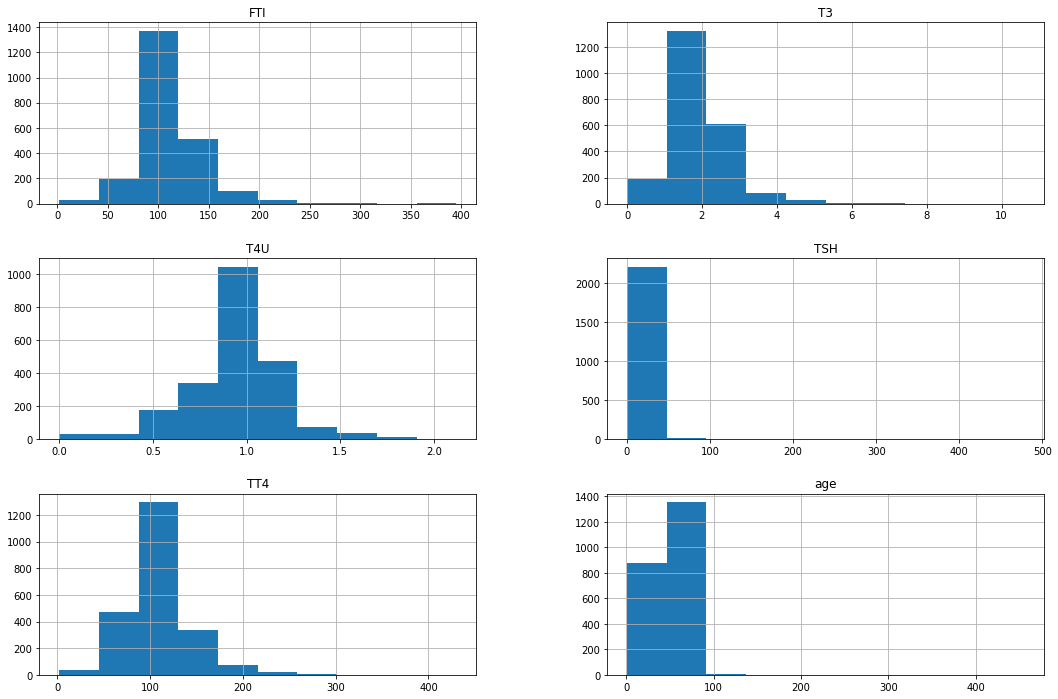

In [73]:
hormones = ['T3', 'age', 'T4U', 'TSH', 'TT4', 'FTI']
data_final[hormones].hist(figsize=(18, 12))
plt.show()

In [74]:
from scipy.stats import boxcox

def analyseHormones(dataset, hormones_columns):
    mpl_fig = plt.figure(figsize=(18, 12))
    for hormone, i in zip(hormones_columns, range(0, len(hormones))):
        ax1 = mpl_fig.add_subplot(100 + (len(hormones) * 10) + 1 + i)
        ax1.boxplot(data_final[hormone])
        ax1.set_title(hormone)
        
    plt.show()

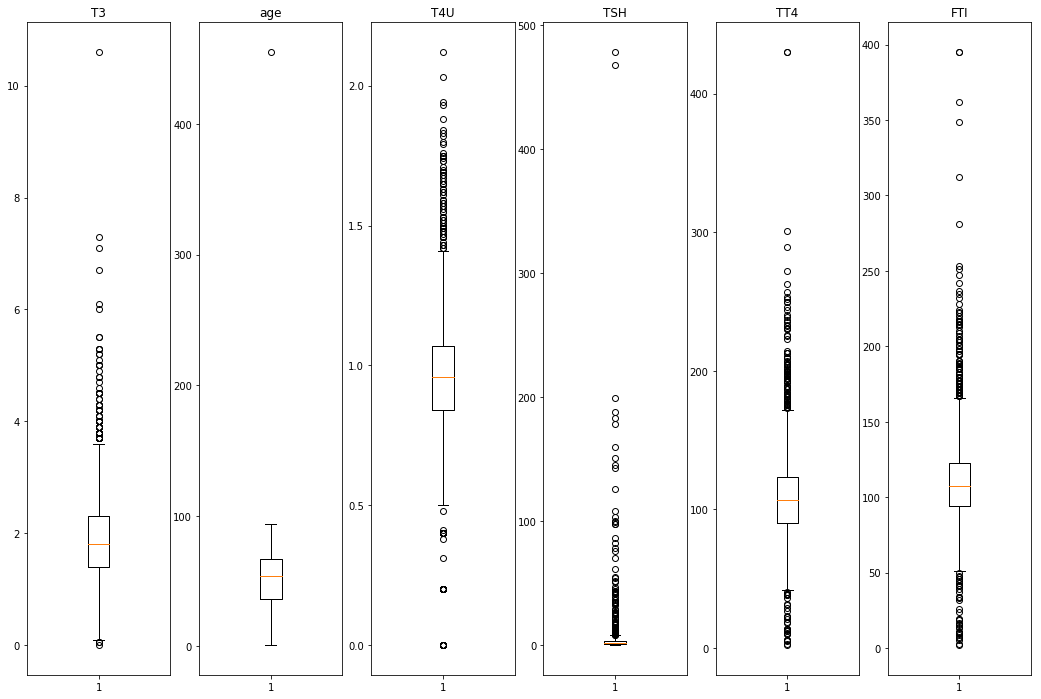

In [75]:
analyseHormones(data_final, hormones)

In [76]:
for hormone in hormones:
    print(hormone)
    _, p = stats.shapiro(data_final[hormone])
    print(p)

    if float(p) < 0.05:
        print('data nie su z normaloveho rozdelenia')
        transformed, att = boxcox(data_final[data_final[hormone] > 0][hormone])
        
        data_final.loc[data_final[hormone] > 0, hormone] = transformed
        
    print('----')

T3
8.177398484962542e-37
data nie su z normaloveho rozdelenia
----
age
6.108890590300824e-40
data nie su z normaloveho rozdelenia
----
T4U
1.1273296114374578e-27
data nie su z normaloveho rozdelenia
----
TSH
0.0
data nie su z normaloveho rozdelenia
----
TT4
2.912913170465719e-35
data nie su z normaloveho rozdelenia
----
FTI
2.712626841007352e-38
data nie su z normaloveho rozdelenia
----


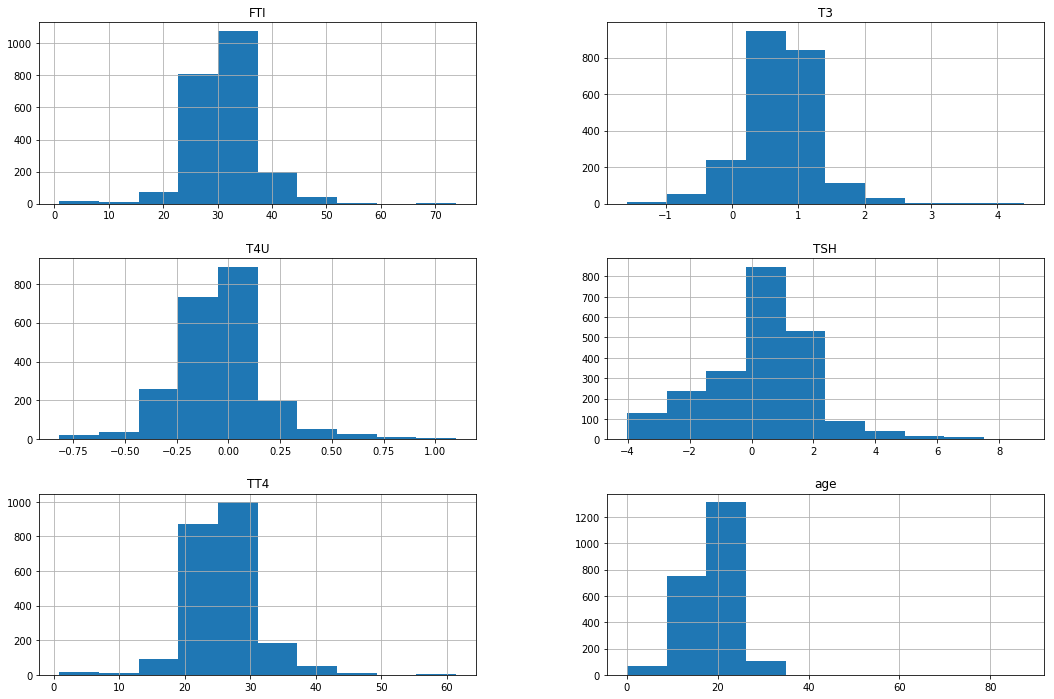

In [77]:
hormones = ['T3', 'age', 'T4U', 'TSH', 'TT4', 'FTI']
data_final[hormones].hist(figsize=(18, 12))
plt.show()

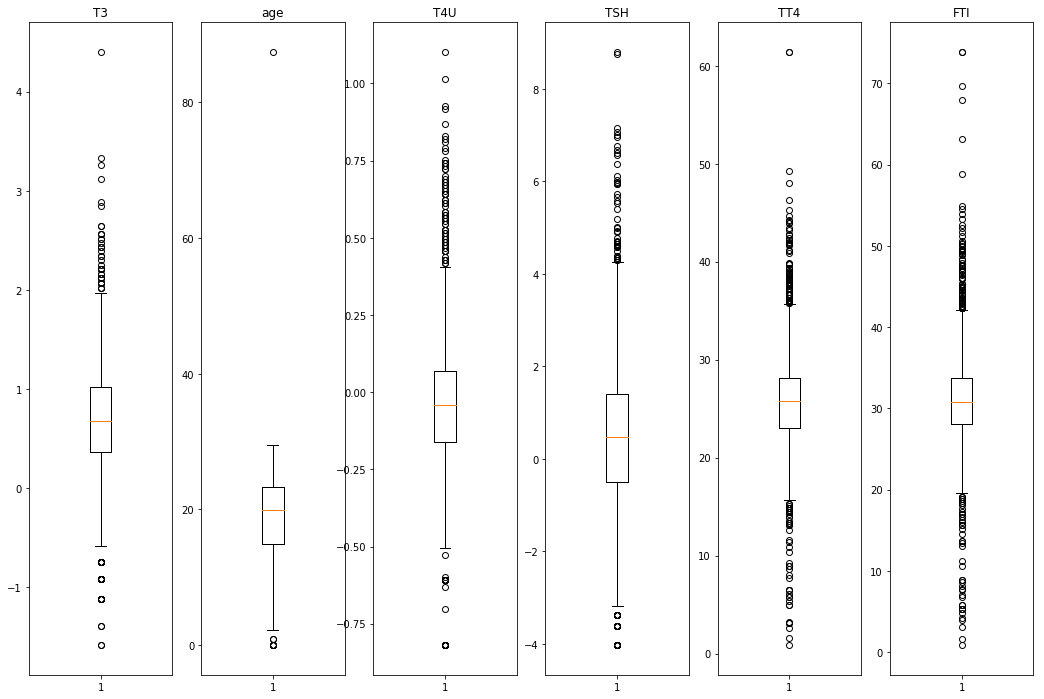

In [78]:
analyseHormones(data_final, hormones)

In [79]:
def printDistribution(hormones_columns):
    fig, ax = plt.subplots(6, 3, figsize=(18,12))
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for hormone, i in zip(hormones_columns, range(0, len(hormones))):
        
        # Vyprintujeme inicialne rozdelenie
        sns.distplot(data_final[hormone], ax=ax[i][0])
        #ax[i][0].title.set_text(hormone + " - Normal")
        
        
        # Vyprintujeme rozdelenie bez outlierov
        out_indexes = t.identify_outliers(data_final, hormone)
        temp_df = data_final.drop(out_indexes.index)
        
        sns.distplot(temp_df[hormone], ax=ax[i][1])
        #ax[i][1].title.set_text(hormone + " - Dropped Indexes")
        
        
        # Vyprintujeme rozdelenie z nahradenim outlierov kvantilom
        temp_df = data_final.copy()
        t.replace_outliers(temp_df, hormone)
    
        sns.distplot(temp_df[hormone], ax=ax[i][2])
        #ax[i][2].title.set_text(hormone + " - 5/95 quantile")
        
    fig.show()

/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/edvin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


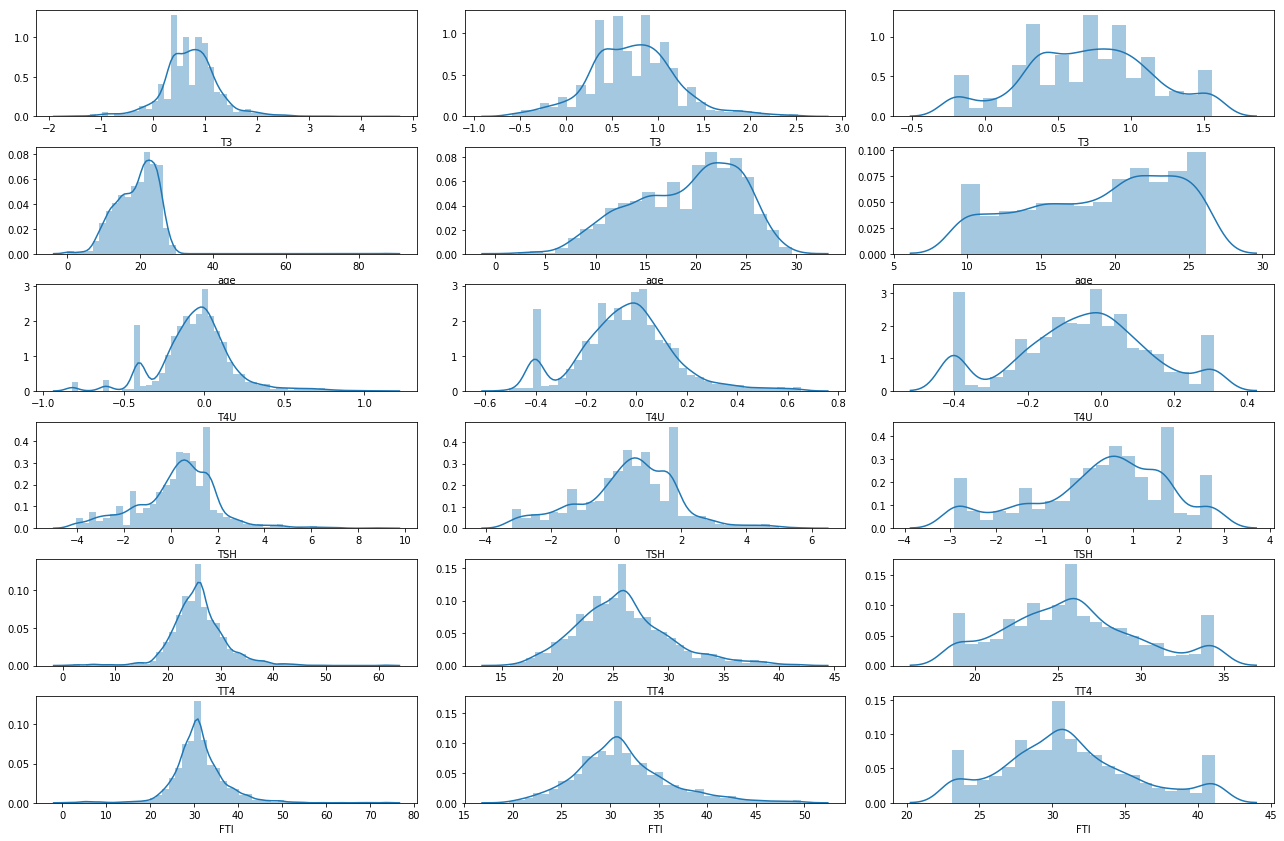

In [80]:
printDistribution(hormones)

1. Doplnit histogramy.
2. Stlpce vratit spat.
3. Vratit spat riadky.
4. Pocet nameranych hodnot - stlpec
5. Zmenit metriku vyhodnocovania pri linearnej regresie a kNN.

In [ ]:
class BinaryEncoder(TransformerMixin):
    def __init__(self, column):
        self.column = column
        
    def fit(self, df, Y=None, **fit_params):
        return
    
    def mapToBool(value):
    if not isinstance(value, str):
        return float('nan')
    return (int(1) if value[0].lower() == 't' else int(0))
    
    def transform(self, df, **transform_params):
        data_final[bool_column] = data_final[bool_column].map(lambda value: mapToBool(value))